<a href="https://colab.research.google.com/github/kmuhan/kmuhandeeplearning/blob/main/circle_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

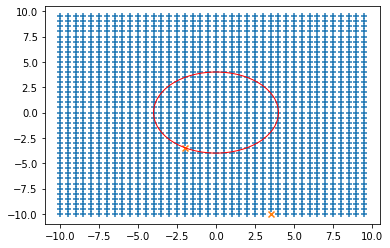

Epoch:0/2001 Error:0.3884199814155444


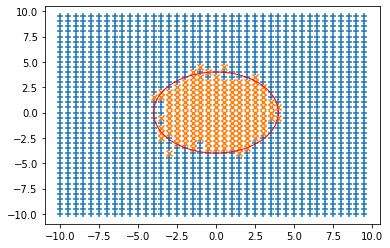

Epoch:20/2001 Error:0.0499894009920768


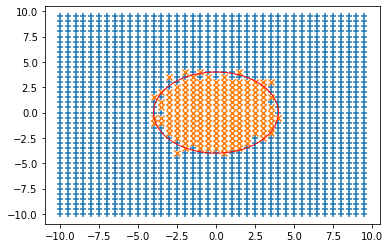

Epoch:40/2001 Error:0.05244895125001109


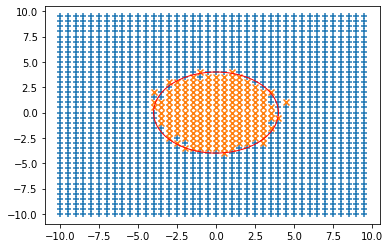

Epoch:60/2001 Error:0.039814794966699554


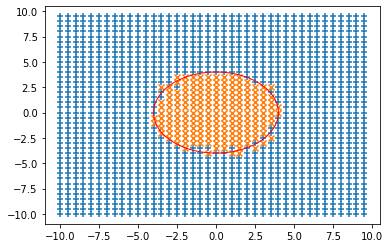

Epoch:80/2001 Error:0.04357835189048232


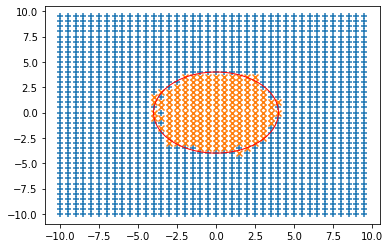

Epoch:100/2001 Error:0.03276645775183617


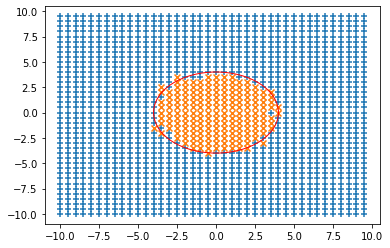

Epoch:120/2001 Error:0.03542427548782311


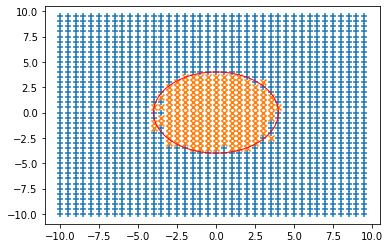

Epoch:140/2001 Error:0.027213064590442194


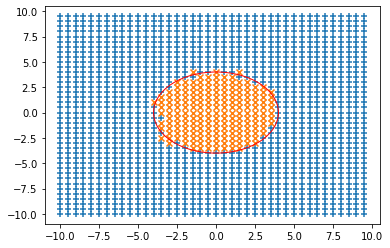

Epoch:160/2001 Error:0.025628677871810543


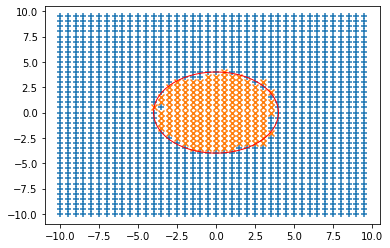

Epoch:180/2001 Error:0.029457805695280163


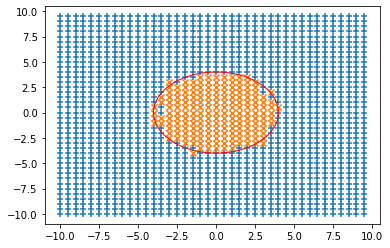

Epoch:200/2001 Error:0.03328533538613755


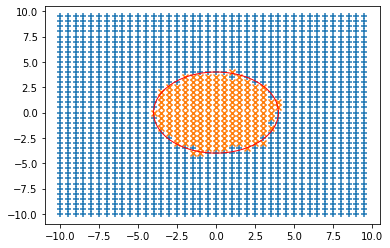

Epoch:220/2001 Error:0.031045018016284457


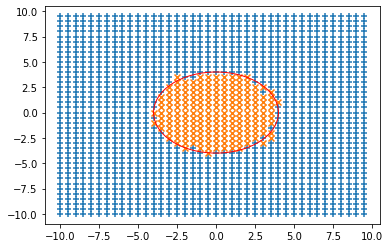

Epoch:240/2001 Error:0.03206310821544492


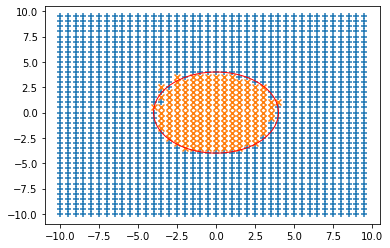

Epoch:260/2001 Error:0.024284467088207414


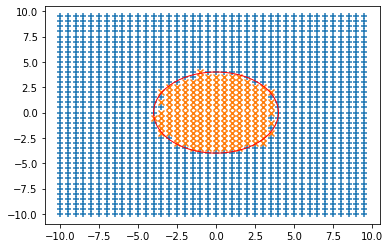

Epoch:280/2001 Error:0.029023948264654365


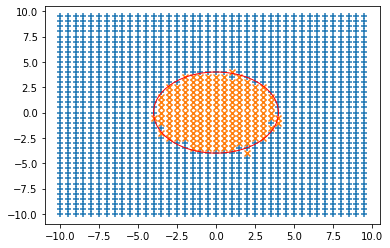

Epoch:300/2001 Error:0.029805784172625777


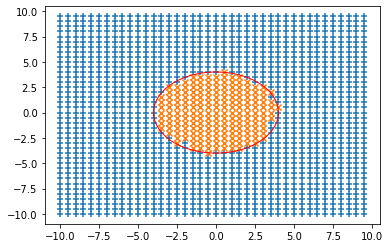

Epoch:320/2001 Error:0.027738127221225768


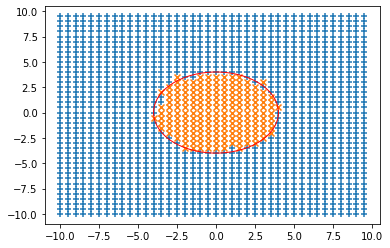

Epoch:340/2001 Error:0.025985200662552298


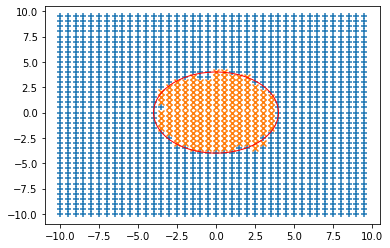

Epoch:360/2001 Error:0.025750690759449354


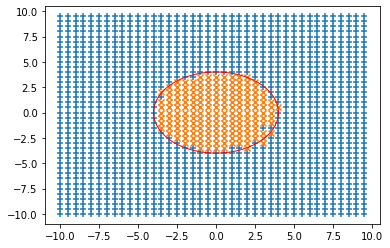

Epoch:380/2001 Error:0.028754490155138493


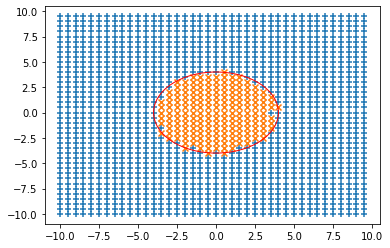

Epoch:400/2001 Error:0.029286689185364385


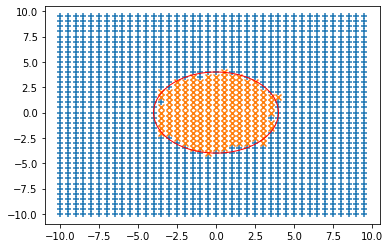

Epoch:420/2001 Error:0.030494737612043604


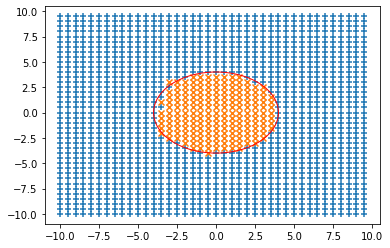

Epoch:440/2001 Error:0.024140290860738448


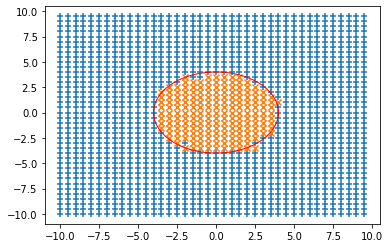

Epoch:460/2001 Error:0.03189632377851048


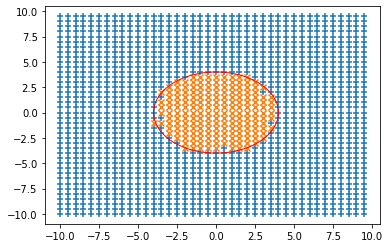

Epoch:480/2001 Error:0.02458361625841545


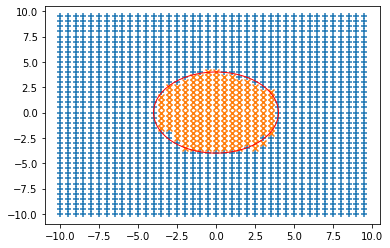

Epoch:500/2001 Error:0.029034206151520837


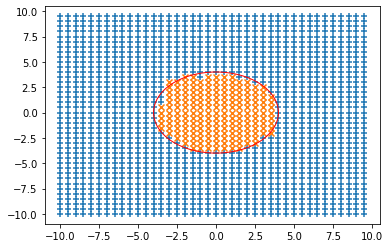

Epoch:520/2001 Error:0.02162502697011333


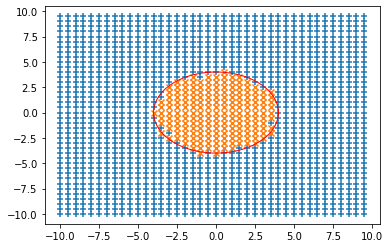

Epoch:540/2001 Error:0.026225220245801605


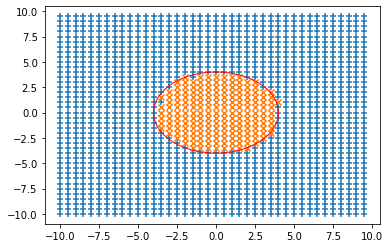

Epoch:560/2001 Error:0.02713857044369715


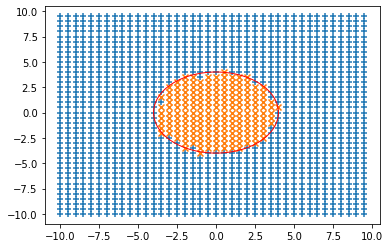

Epoch:580/2001 Error:0.027771522368526216


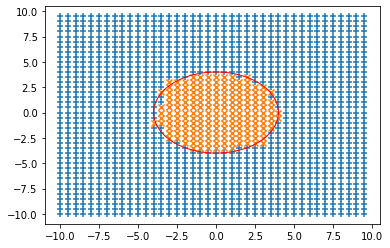

Epoch:600/2001 Error:0.025878495623854386


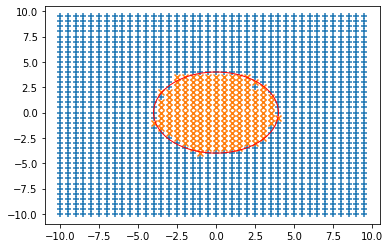

Epoch:620/2001 Error:0.02933193603375107


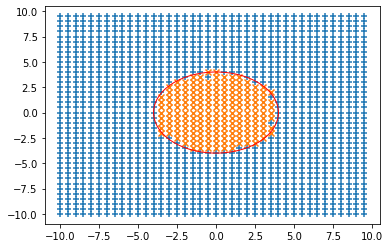

Epoch:640/2001 Error:0.022239268130788328


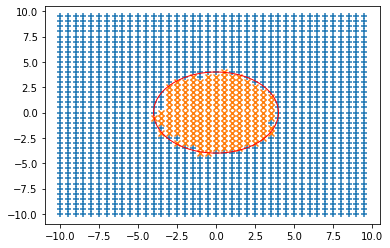

Epoch:660/2001 Error:0.02754473120877278


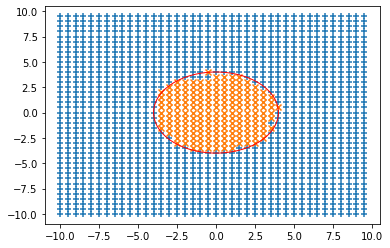

Epoch:680/2001 Error:0.02019941232048609


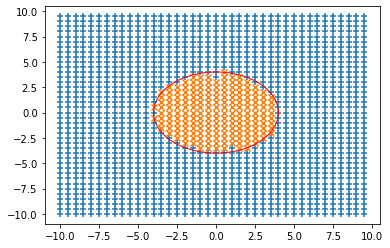

Epoch:700/2001 Error:0.028684080500636797


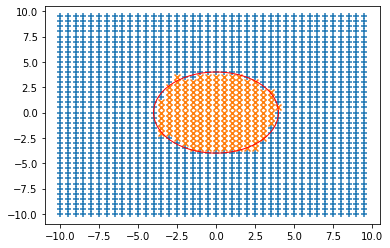

Epoch:720/2001 Error:0.026557395420425525


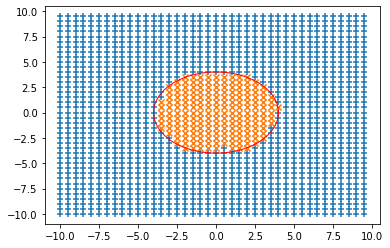

Epoch:740/2001 Error:0.024339315757192073


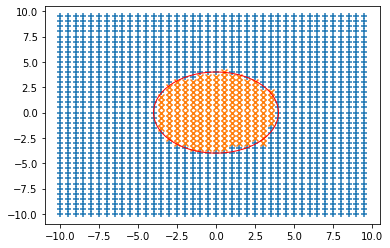

Epoch:760/2001 Error:0.025861167481005046


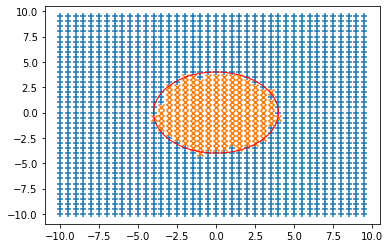

Epoch:780/2001 Error:0.024648684066288177


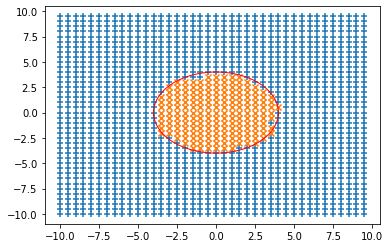

Epoch:800/2001 Error:0.021634102986631546


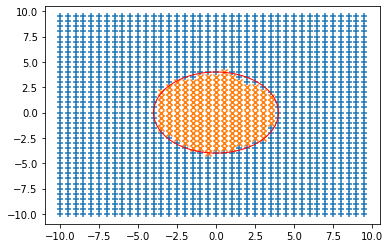

In [ ]:
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt

radius = 4

X = np.arange(-10, 10, 0.5)
Y = np.arange(-10, 10, 0.5)

input_data = []
correct_data = []

for x in X:
  for y in Y:
    input_data.append([x, y])
    if (np.square(x) + np.square(y) <= np.square(radius)):
      correct_data.append([0, 1])
    else:
      correct_data.append([1, 0])

n_data = len(input_data)
input_data = np.array(input_data)
correct_data = np.array(correct_data)

n_in = 2
n_mid = 6
n_out = 2

wb_width = 0.01
eta = 0.08
epoch = 2001
interval = 20

class MiddleLayer:
  def __init__(self, n_upper, n):
    self.w = wb_width * np.random.randn(n_upper, n) # n_upper X n 짜리 난수 행렬 반환
    self.b = wb_width * np.random.randn(n)
  
  def forward(self, x):
    self.x = x
    u = np.dot(x, self.w) + self.b
    self.y = 1 / (1 + np.exp(-u))
  
  def backward(self, grad_y):
    delta = grad_y * (1- self.y) * self.y # y 기울기 곱하기 시그모이드 도함수

    self.grad_w = np.dot(self.x.T, delta)
    self.grad_b = np.sum(delta, axis=0)

    self.grad_x = np.dot(delta, self.w.T)
  
  def update(self, eta):
    self.w -= eta * self.grad_w
    self.b -= eta * self.grad_b

class OutputLayer:
  def __init__(self, n_upper, n):
    self.w = wb_width * np.random.randn(n_upper, n)
    self.b = wb_width * np.random.randn(n)

  def forward(self, x):
    self.x = x
    u = np.dot(x, self.w) + self.b
    self.y = np.exp(u) / (np.sum(np.exp(u), axis=1, keepdims=True)) 
  
  def backward(self, t):
    delta = self.y - t

    self.grad_w = np.dot(self.x.T, delta)
    self.grad_b = np.sum(delta, axis=0)

    self.grad_x = np.dot(delta, self.w.T)
  
  def update(self, eta):
    self.w -= eta * self.grad_w
    self.b -= eta * self.grad_b

middle_layer = MiddleLayer(n_in, n_mid)
middle_layer_two = MiddleLayer(n_mid, n_mid)
output_layer = OutputLayer(n_mid, n_out)

for i in range(epoch):
  index_random = np.arange(n_data)
  np.random.shuffle(index_random)
  total_error = 0
  x_1 = []
  y_1 = []
  x_2 = []
  y_2 = []

  for idx in index_random:
    x = input_data[idx]
    t = correct_data[idx]

    #순전파
    middle_layer.forward(x.reshape(1, 2))
    output_layer.forward(middle_layer.y)

    #역전파
    output_layer.backward(t.reshape(1, 2))
    middle_layer.backward(output_layer.grad_x)

    #가중치 편향 수정 (확률적 경사 하강법)
    middle_layer.update(eta)
    output_layer.update(eta)

    if i%interval == 0:
      y = output_layer.y.reshape(-1)
        
      total_error += - np.sum(t * np.log(y + 1e-7)) # 교차 엔트로피 오차
    
      if y[0] > y[1]:
          x_1.append(x[0])
          y_1.append(x[1])
      else:
          x_2.append(x[0])
          y_2.append(x[1])

  if i%interval == 0:
          
    # 출력 그래프 표시
    plt.gca().add_patch(patches.Circle((0,0), radius=radius, color='r', fill=False))
    plt.scatter(x_1, y_1, marker="+")
    plt.scatter(x_2, y_2, marker="x")
    plt.show()
          
    # 에포크 수와 오차 표시
    print("Epoch:" + str(i) + "/" + str(epoch), "Error:" + str(total_error/n_data))
